# first experiment with the zener diodes


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# high voltage power supply measurements
# high voltage in kV
V_HV = [
    10,
    14.7,
    19.9,
    24.9,
    29.9,
    34.9,
    39.9,
    49.9,
    59.9,
    69.9,
    79.9,
    85,
    90,
    100
]
# current in mA
I_HV = [
    0.01,
    0.01,
    0.02,
    0.03,
    0.03,
    0.04,
    0.04,
    0.06,
    0.07,
    0.10,
    0.13,
    0.15,
    0.16,
    0.21
]

# Volt 
V_Voltmeter = [
    0.233,
    0.364,
    0.506,
    0.643,
    0.780,
    0.917,
    1.053,
    1.369,
    1.690,
    2.012,
    2.593,
    2.832,
    3.018,
    0
]

# resistors
# 8x 100 MOhm circuit
R1 = 800 * 1e6 # Ohm
# 22 kOhm for measurement, voltage divider
R2 = 22 * 1e3 # Ohm

# return expected voltage read by multimeter for a HV of x
f_expected_voltage = lambda x: x * R2 / (R1 + R2) # Units of x

# Zener diodes 
# 200 V per diode, 7 diodes
V_zener = 1.4 # kV

# expected voltage read by multimeter
# adjust voltage input to voltage dropped after zener
V_HV_after_zener = [V-V_zener for V in V_HV]
V_expected = [f_expected_voltage(V*1000) for V in V_HV_after_zener] # convert kV to V


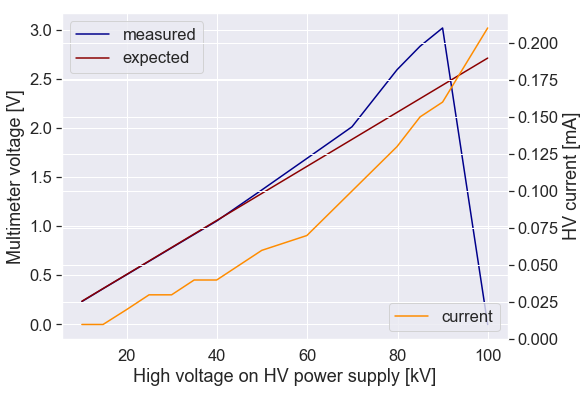

In [37]:

# plots
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(V_HV, V_Voltmeter, label='measured', color='darkblue')
plt.plot(V_HV, V_expected, label='expected', color='darkred')
_ = plt.xlabel('High voltage on HV power supply [kV]')
_ = plt.ylabel('Multimeter voltage [V]')
_ = plt.legend(loc='best')

ax2 = ax.twinx()
ax2.plot(V_HV, I_HV, label='current', color='darkorange')
_ = plt.legend(loc='lower right')

_ = plt.ylabel('HV current [mA]')
